## Project Objective
- Customer Segmentation Using Unsupervised Learning Technique

## Unsupervisee Machine Learning - Clustering K-Means

K-means clustering is unsupervised learning teachnique that is suitable for working with unlabelled data that lacks predifined 
categories or groups. The primary objective of this algorithm is to group similar data points togetther, with the number of 
groups determined by the value of K. The algorithm follows an iterative approach and assigns each data point to one of the K 
groups based on the features that are provided. 

In [105]:
# import required libraries 

# Data Analysis
import pandas as pd
import numpy as np

# Data Visualisation libraries 
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning and Evaluation 
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings 
warnings.filterwarnings("ignore")

In [106]:
# Load dataset
import pandas as pd

data = pd.read_csv(r"C:\Users\hp\Desktop\10Alytics\Python\Machine Learning\ML Unsupervised Learning WDIV 29-10-23\Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [107]:
data.shape

(200, 5)

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [109]:
data.describe().T 

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual_Income_(k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending_Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

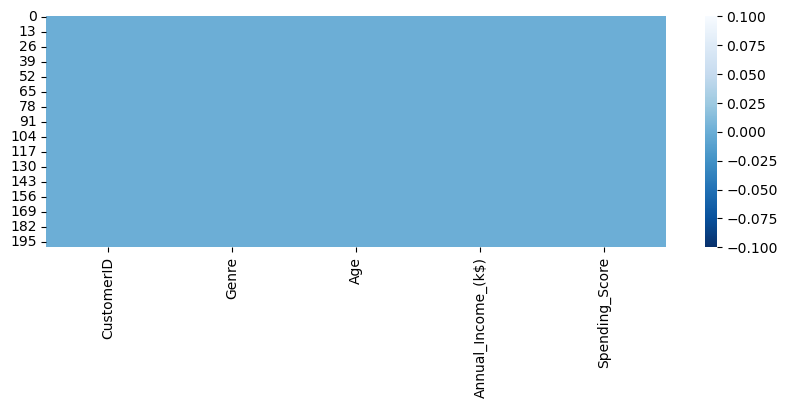

In [110]:
# Check for missing values

print(data.isnull().sum())

# Visualising the missing value 
plt.figure(figsize = (10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Pre-Processing

In [111]:
# Check for duplicates

print(data.duplicated().sum())

0


### Exploratory Data Analysis

- Univariate
- Bivariate
- Multivariate 

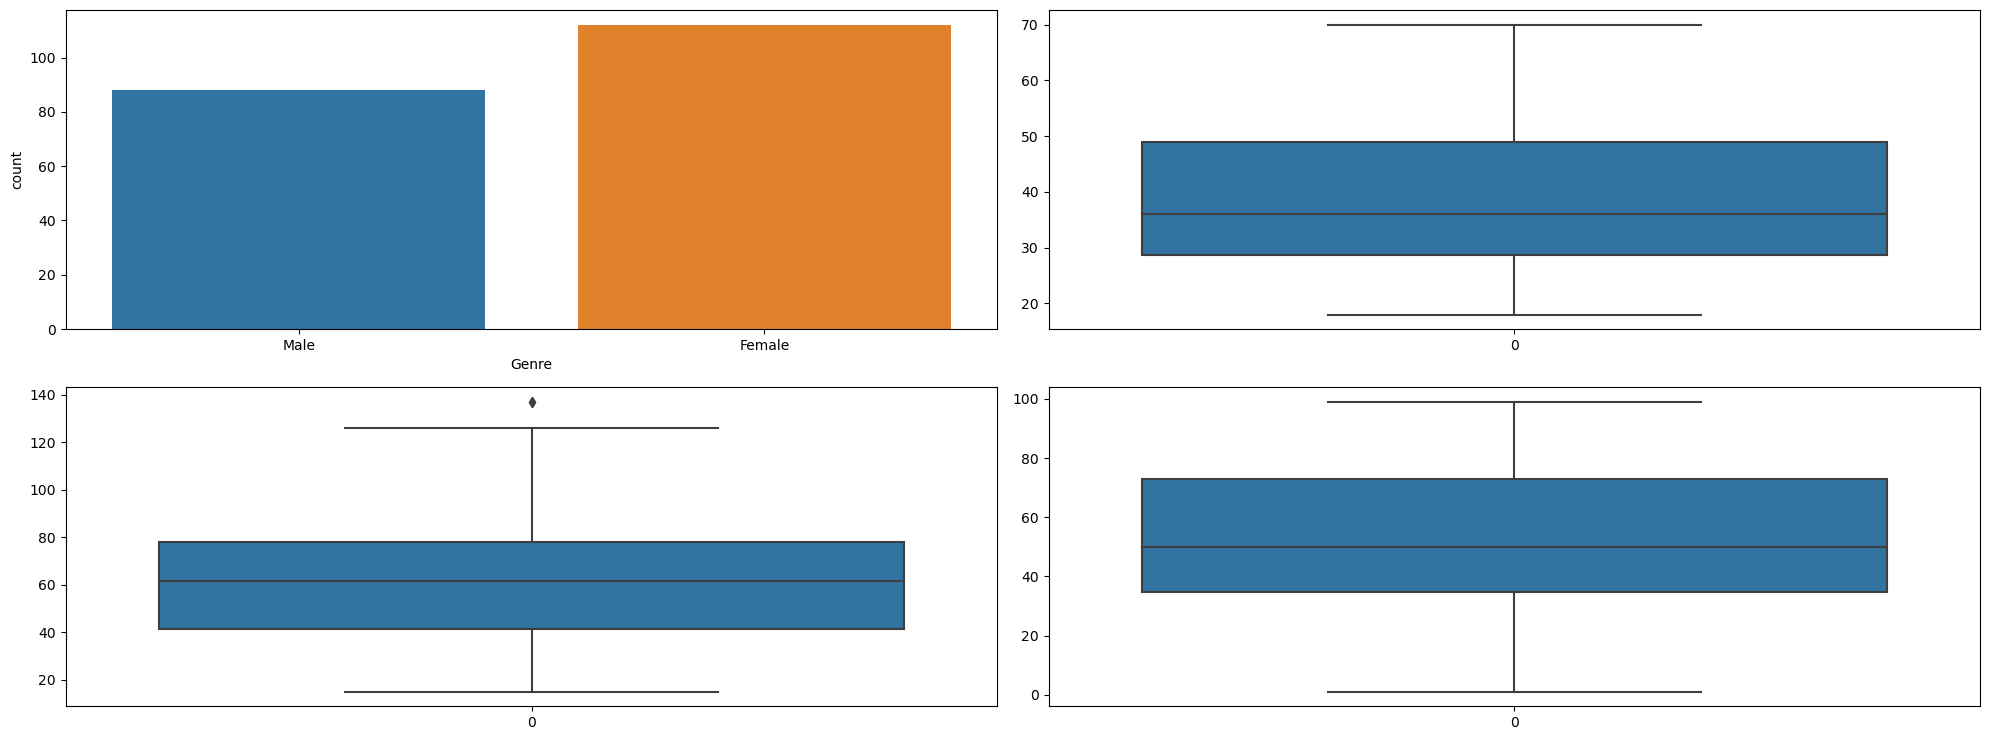

In [112]:
fig, axs = plt.subplots(2,2, figsize = (20, 7.5))
plt1 = sns.countplot(x = 'Genre', data =data, ax = axs[0,0])
plt2 = sns.boxplot(data['Age'], ax = axs[0,1])
plt3 = sns.boxplot(data['Annual_Income_(k$)'], ax = axs[1,0])
plt4 = sns.boxplot(data['Spending_Score'], ax = axs[1,1])

plt.tight_layout()

# Observations/Narrations  

- No missing data
- No duplicates
- Gender is wrongly spelt. I will correct it
- There is an outlier in the annual income
- I need to explore the data more

In [113]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance/ method initialisation
encoder = LabelEncoder()

# Loop through columns, except 'survived'
for c in data.columns[1:]:
    if data[c].dtype == 'object':
        data[c] = encoder.fit_transform(data[c])  # Use the encoder to transform the data
    else:
        data[c] = data[c]

data.head()


,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [114]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [115]:
# Remove CustomerID column
data.drop('CustomerID', axis=1, inplace=True)

In [116]:
data.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


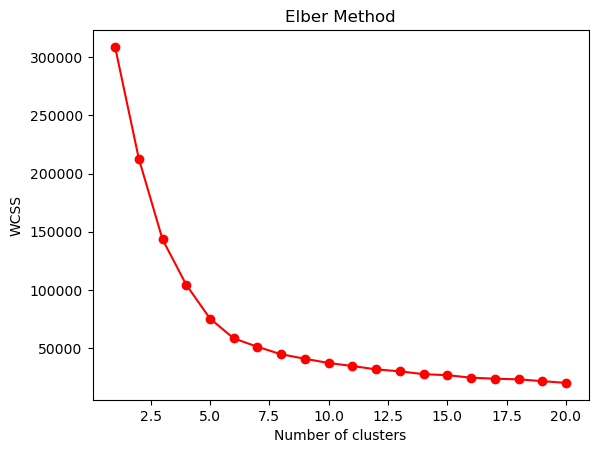

In [119]:
# Determine optimal number of clusters

wcss = []  # Within Cluster Sum of Squares (WCSS). This known as elbow method
for i in range (1, 21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 21), wcss, color= 'red', marker='o')
plt.title('Elber Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [151]:
# Fit K-means clustering model 
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmeans.fit(data)

# Add cluster labels to data
data['cluster'] = kmeans.labels_

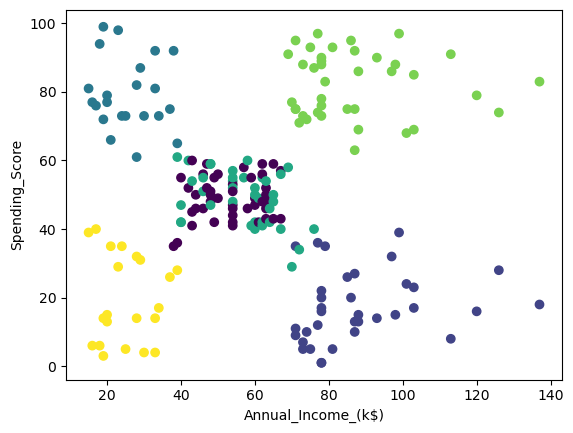

0.45382447211876453

In [152]:
# visualise cluster results
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c = data['cluster'], label = 'Centroids')
plt.xlabel('Annual_Income_(k$)')
plt.ylabel('Spending_Score')
plt.show()

# Calculate silhouette score
from sklearn.metrics import silhouette_score

silhouette_score(data, kmeans.labels_)

## The Silhouette Score ranges from -1 to 1
The Silhouette Score ranges from -1 to 1, and it provides insight into the "goodness" of the clustering:

A high Silhouette Score (close to 1) indicates that the object is well-matched to its own cluster and poorly-matched to neighboring clusters. This suggests that the data points within clusters are relatively well-separated.

A score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters, which could be a sign of ambiguity in the clustering.

A low Silhouette Score (close to -1) indicates that the object is incorrectly clustered; it is more similar to other clusters than its own.

Positive Value: A Silhouette Score greater than 0.0 indicates that the clusters are well-separated on average. In the case of this project, the score is positive (0.4538), which is a good sign.

Strength of Separation: The magnitude of the score matters. A score closer to 1 suggests strong separation between clusters, while a score closer to 0 indicates overlapping clusters, making it challenging to distinguish them. A score close to -1 implies that data points may have been assigned to the wrong clusters.

## Interpretation:

A Silhouette Score of 0.4538 is moderately good. It suggests that, on average, the clusters are reasonably well-separated and data points within the same cluster are more similar to each other than to those in other clusters.
This score indicates a moderate level of cluster cohesion and separation, meaning the clusters in this unsupervised learning model are reasonably distinct, but there may still be room for improvement.